# HR Analytics Project- Understanding the Attrition in HR

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

We have to undrstand the data annd find out whether the employee is attrited or not.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_csv('HR analytics.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [5]:
df.shape   #checking te data dimensiion

(1470, 35)

In [6]:
df.dtypes   #checking the data types of each column

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [49]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Visualization of the data

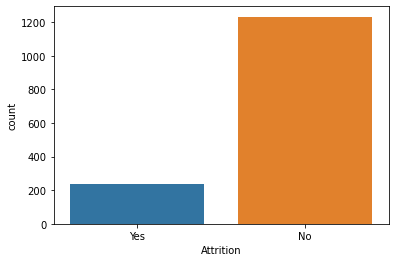

In [9]:
sns.countplot(x='Attrition',data=df)
plt.show()

>As we see from above graph that number of not attrited people is more than no of attrited people.

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

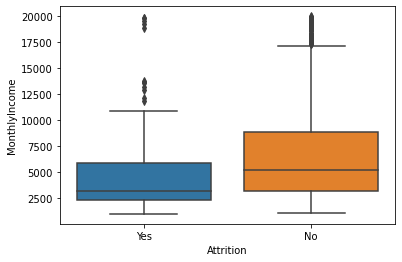

In [10]:
sns.boxplot(x ='Attrition', y ='MonthlyIncome', data = df)

>As we see from the above graph that with monthly income more prople are not attrited as compare to people that are attrited.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

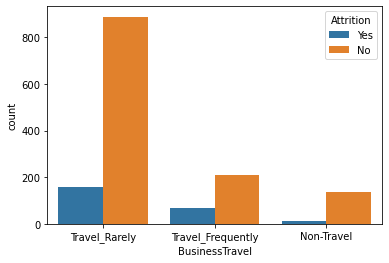

In [12]:

sns.countplot(x="BusinessTravel", hue="Attrition", data=df)

>As we see from the above graph that more no of people are not attrited if they are travel rarely, travel frequently or not travelling.

<AxesSubplot:xlabel='Department', ylabel='count'>

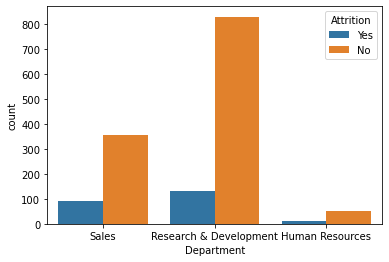

In [16]:
sns.countplot(x="Department", hue="Attrition", data=df)

>We can observe from the above graph that in research and development department majority of the people are not attrited.

>In sales department also majority of the people are not attrited.

>In Human resource department also more no of people are not attrited.

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

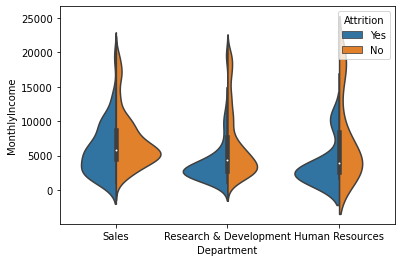

In [18]:
sns.violinplot(x ="Department", y ="MonthlyIncome", hue ="Attrition",  data = df, split = True) 

>As we see from the above graph that in Research and development department where salary is less than 5000 more number of people attrited but as  the salary increases the attrited people are less as compare to not attrited people.


>In sales department we can see that when the salary is in range of 0 to 10000, the attrited people are less as compare to not attrited people.

>In HR department when the salary range is 0 to 5000, people are more attrited.

<AxesSubplot:>

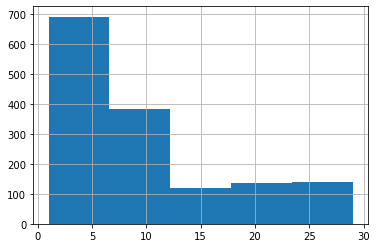

In [19]:
df.DistanceFromHome.hist(bins=5)

>As we see from the above graph that majority of the people live within 10km  from the office.

<AxesSubplot:xlabel='Education', ylabel='count'>

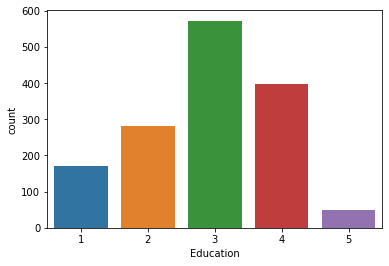

In [23]:
sns.countplot(x='Education', data=df)

>As we see from the above graph that majority of the people have education level of 3.

<AxesSubplot:xlabel='Education', ylabel='count'>

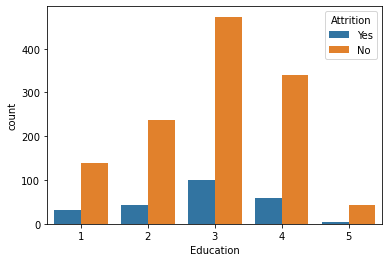

In [24]:
sns.countplot(x="Education", hue="Attrition", data=df)

>As we see from the above graph that most of the peple are not attrited from every level of education.

<AxesSubplot:xlabel='Gender', ylabel='count'>

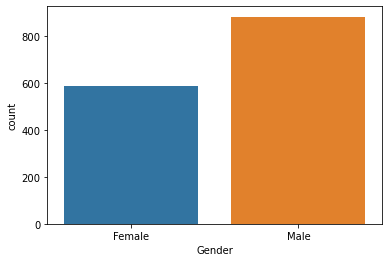

In [26]:
sns.countplot(x='Gender', data=df)

>We can observe from the above graph that the company has more male employees as compare to female.

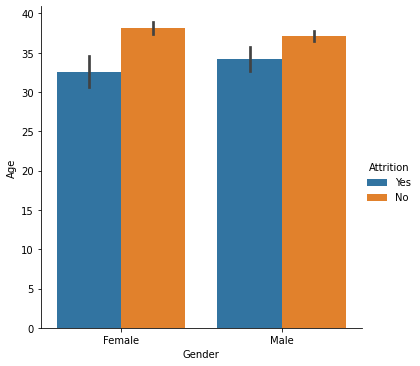

In [25]:
sns.catplot(x="Gender",y="Age",hue="Attrition", data=df, kind='bar')

>As we see from the above graph that both male and female have less number of people who are Attrited.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

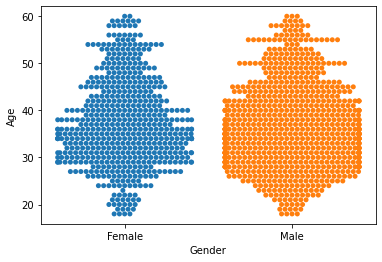

In [27]:
sns.swarmplot(x='Gender',y='Age',data=df)

>We can observe from the above plot that the company has majority of the employees are in between age of 25 to 45.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

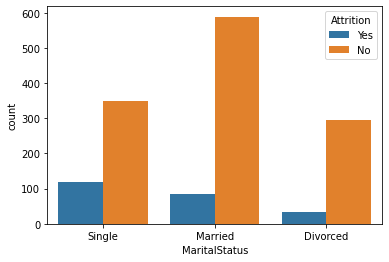

In [28]:
sns.countplot(x="MaritalStatus", hue="Attrition", data=df)

>We can observe from the above graph that people are less attrited with the company whether they are single, married or divorced.

<AxesSubplot:xlabel='EducationField', ylabel='count'>

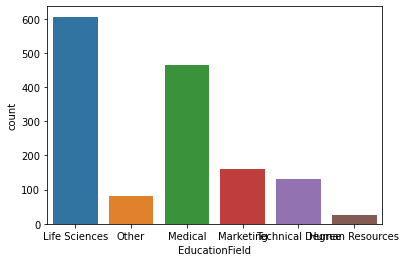

In [29]:
sns.countplot(x="EducationField", data=df)

>We can observe from the above plot that the majority of the employees in the company are from life sciences field.

In [30]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

>From the above stats we can see that highest number of people are highly satisfied from the job.

In [31]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

>We can see from the above stats that less number of people are doing overtime in the company.

3    1244
4     226
Name: PerformanceRating, dtype: int64

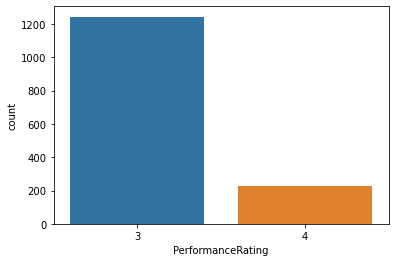

In [34]:
sns.countplot(x="PerformanceRating", data=df)
df['PerformanceRating'].value_counts()

>From the above graph we can see that only 226 people have high performance rating.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Attrition'>

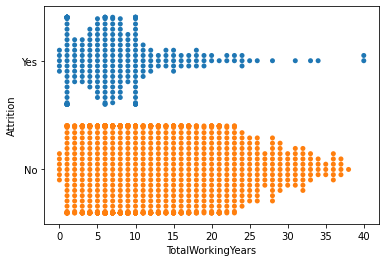

In [36]:
sns.swarmplot(x='TotalWorkingYears',y='Attrition',data=df)

>From the above graph we can observe that employee in 1th year and 10th year number of people that are attrited are same that are not attrited.

<AxesSubplot:>

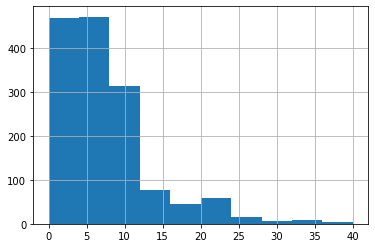

In [40]:
df.YearsAtCompany.hist()

>From the above graph we can see that majority of the employees are with the company from past 7-8 years

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'Department'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EducationField'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>,
        <AxesSubp

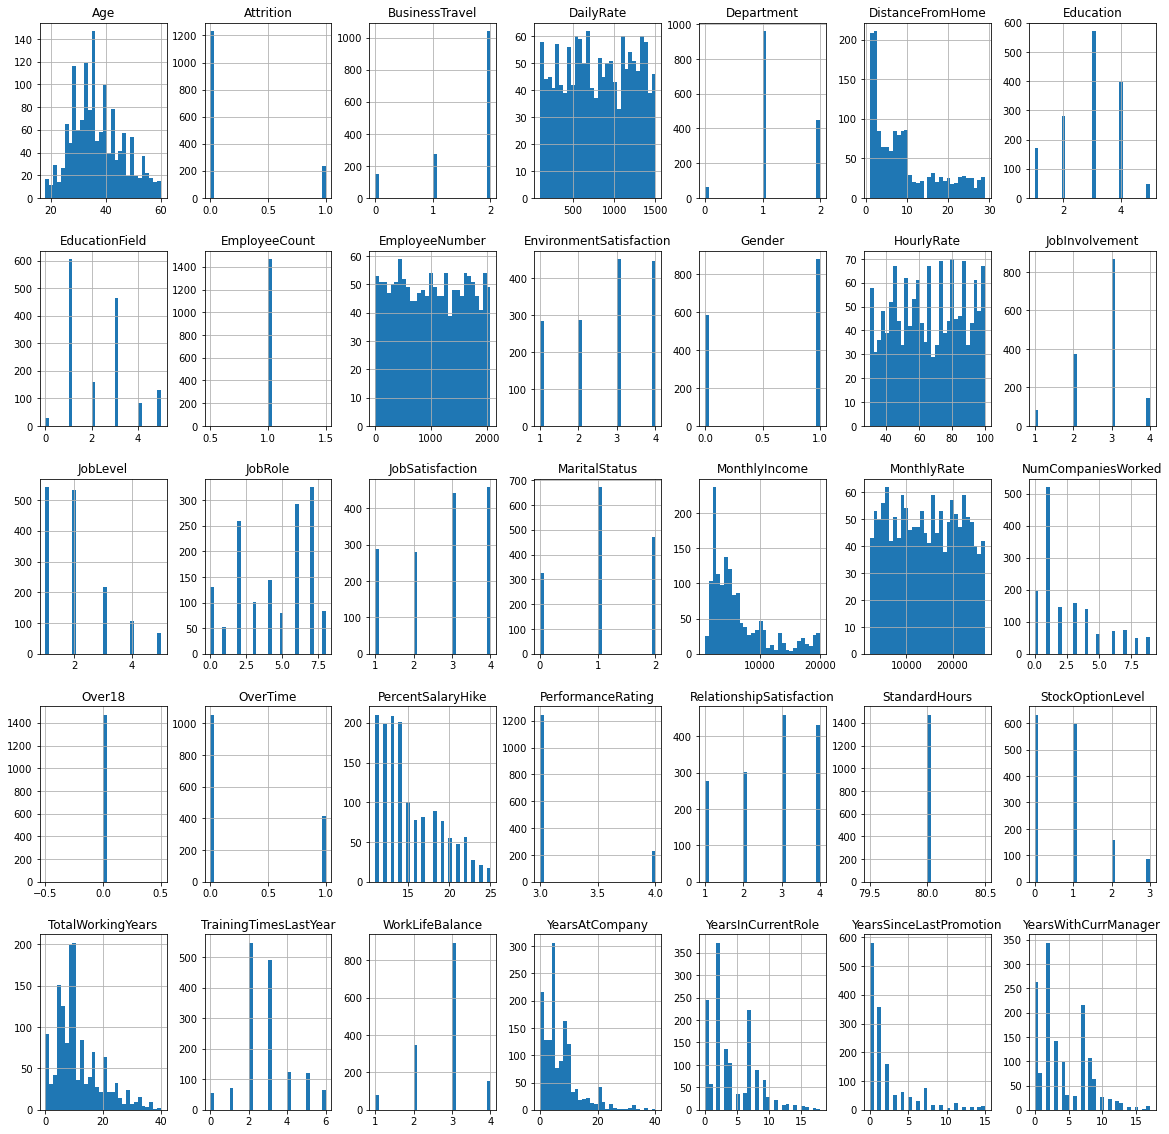

In [48]:
#Histograms of every column to see the numeric data distribution of the column
df.hist(figsize=(20,20), grid = True, layout = (5,7), bins = 30)

In [41]:
#checking the null values in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

>From the above stats we can see that their is no null values in the dataset.

In [42]:
#Changing thhe datatypes of te object column
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [43]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,0.0,1.0,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,0.0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,0.0,1.0,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,0.0,1.0,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,0.0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,0.0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,4,1.0,42,2,3,0.0,1,1.0,9991,21457,4,0.0,0.0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,2,1.0,87,4,2,4.0,2,1.0,6142,5174,1,0.0,1.0,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,0.0,14,3,4,80,0,17,3,2,9,6,0,8


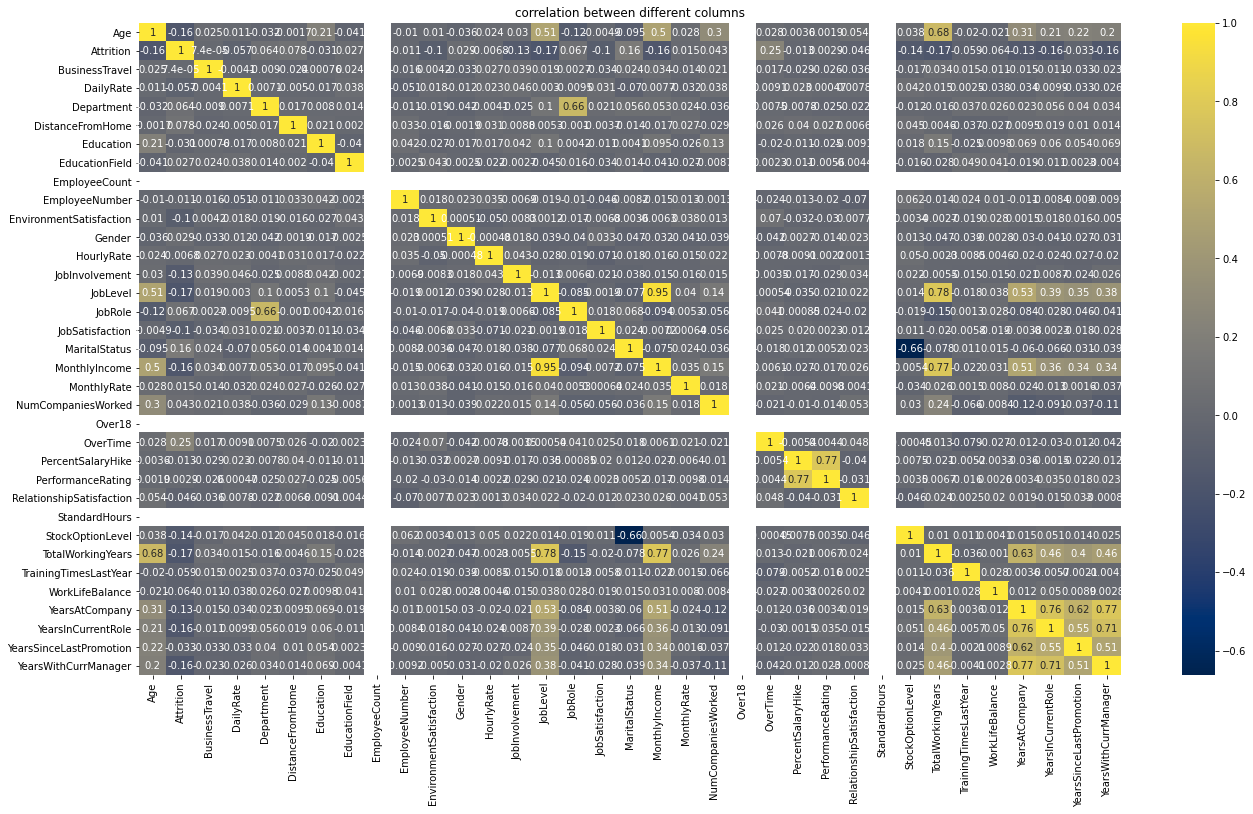

In [45]:
#Checking the correlation between differentm columns in the dataset
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

In [46]:
#defining corr between every column to the target column

corr_matrix=df.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

>We can observe from the above stats that 'Overtime' column is most positively correlated column with the 'Attrition' column.

>We can also see that 'TotalWorkingYears' column is the most negatively correlated column with the 'Attrition' column.

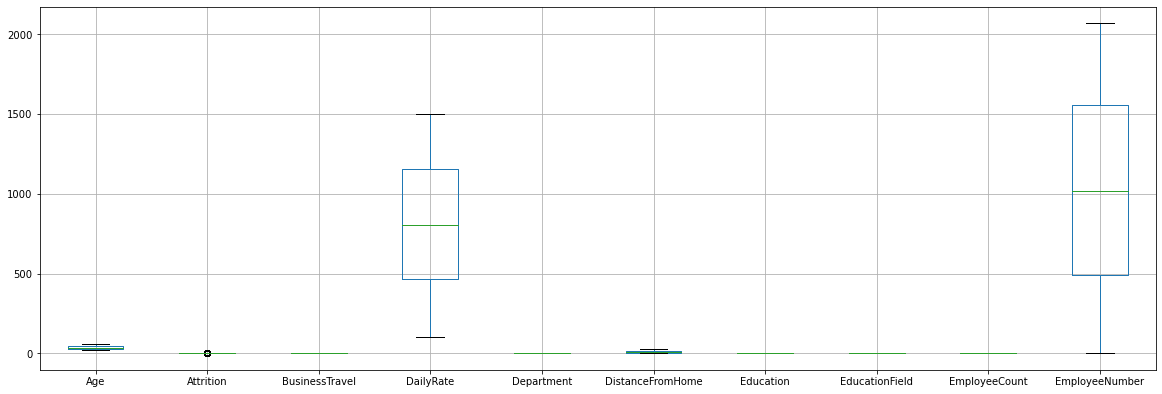

In [50]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

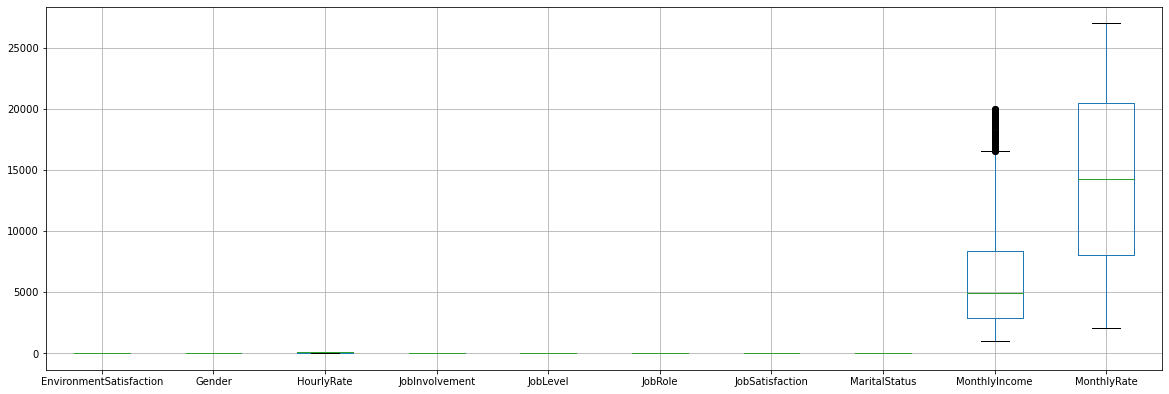

In [51]:
#checking the outliers
df.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

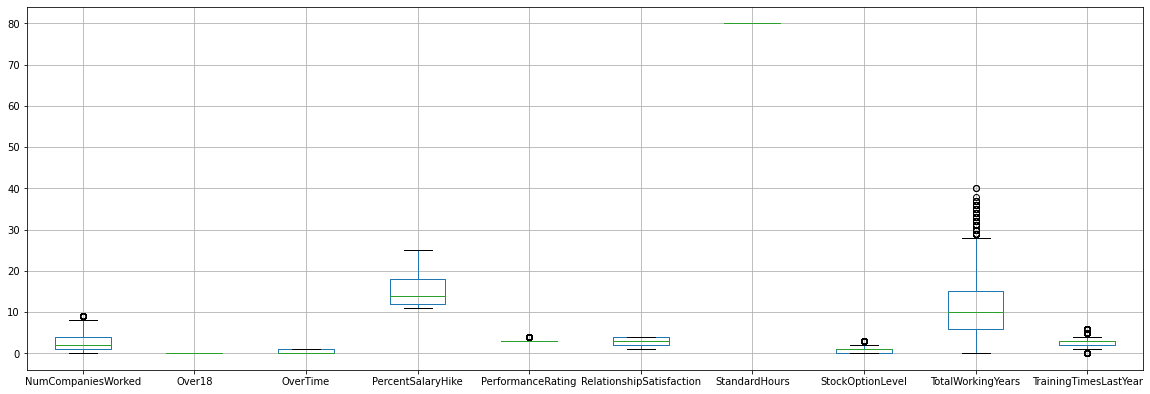

In [52]:
#checking the outliers
df.iloc[:,20:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

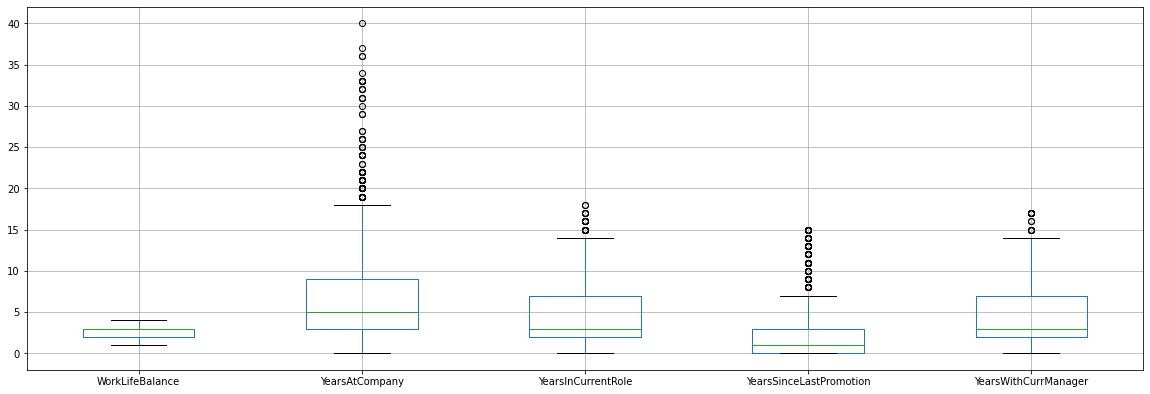

In [53]:
#checking the outliers
df.iloc[:,30:36].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

>We can observe that their are outliers in 'Monthly Income' column, But Some senior employees or higher position staff have more salaiers than the range of that column 

>We can see that their are considerable outliers in 'TotalWorkingYears', but senior staff from age above 50 have been working in the company so that outliers are those employees.

>We can see that their are considerable outliers in 'YearsAtCompany', But it might be possible that some senior employees have been working with the company from their starting of career.

>We can see that their are considerable outliers in 'YearsSinceLastPromotion', but promotion is based on performance, so might be possible that these employees are not performing well or these employees are in a position from where they can't be promoted further.

In [54]:
#checking the skewness in the data
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

>As their is no considerable skewness present in the continous data column so we don't have to remove skewness from the data.

>There are 4 columns which are not useful in predicting the Attrition.

>The columns are EmployeeCount, EmployeeNumber, Over18 and StandardHour.

In [55]:
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)
df.drop('EmployeeNumber', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)

In [56]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,42,2,3,0.0,1,1.0,9991,21457,4,0.0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,87,4,2,4.0,2,1.0,6142,5174,1,1.0,20,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,14,3,4,0,17,3,2,9,6,0,8


In [57]:
df.shape

(1470, 31)

In [58]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop('Attrition', axis=1)
y=df['Attrition']

In [59]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2.0,613,1.0,6,1,3.0,4,1.0,42,2,3,0.0,1,1.0,9991,21457,4,0.0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2.0,155,1.0,4,3,1.0,2,1.0,87,4,2,4.0,2,1.0,6142,5174,1,1.0,20,4,2,1,6,0,3,6,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,14,3,4,0,17,3,2,9,6,0,8


In [60]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [61]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.8435374149659864
At random state 0, the testing accuracy is:- 0.8367346938775511


At random state 1, the training accuracy is:- 0.8494897959183674
At random state 1, the testing accuracy is:- 0.8095238095238095


At random state 2, the training accuracy is:- 0.8401360544217688
At random state 2, the testing accuracy is:- 0.8367346938775511


At random state 3, the training accuracy is:- 0.8401360544217688
At random state 3, the testing accuracy is:- 0.8605442176870748


At random state 4, the training accuracy is:- 0.8367346938775511
At random state 4, the testing accuracy is:- 0.8537414965986394


At random state 5, the training accuracy is:- 0.8418367346938775
At random state 5, the testing accuracy is:- 0.8333333333333334


At random state 6, the training accuracy is:- 0.8418367346938775
At random state 6, the testing accuracy is:- 0.8401360544217688


At random state 7, the training accuracy is:- 0.8384353741496599
At random state 7,

At random state 63, the training accuracy is:- 0.8401360544217688
At random state 63, the testing accuracy is:- 0.8401360544217688


At random state 64, the training accuracy is:- 0.8401360544217688
At random state 64, the testing accuracy is:- 0.8537414965986394


At random state 65, the training accuracy is:- 0.8409863945578231
At random state 65, the testing accuracy is:- 0.8469387755102041


At random state 66, the training accuracy is:- 0.8375850340136054
At random state 66, the testing accuracy is:- 0.8435374149659864


At random state 67, the training accuracy is:- 0.8409863945578231
At random state 67, the testing accuracy is:- 0.8605442176870748


At random state 68, the training accuracy is:- 0.8452380952380952
At random state 68, the testing accuracy is:- 0.8163265306122449


At random state 69, the training accuracy is:- 0.8528911564625851
At random state 69, the testing accuracy is:- 0.7993197278911565


At random state 70, the training accuracy is:- 0.8477891156462585
At 

>From the above stats, at random state 26 the testing accuracy and training accuracy is hightest.

>Testing the best Random State in different algorithms

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=26)

In [65]:
model=[LogisticRegression(),SVC(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()]

In [66]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('accuracy score of',n,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8945578231292517
[[260   1]
 [ 30   3]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94       261
         1.0       0.75      0.09      0.16        33

    accuracy                           0.89       294
   macro avg       0.82      0.54      0.55       294
weighted avg       0.88      0.89      0.86       294



accuracy score of SVC() is:
0.8877551020408163
[[261   0]
 [ 33   0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       261
         1.0       0.00      0.00      0.00        33

    accuracy                           0.89       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.79      0.89      0.83       294



accuracy score of RandomForestClassifier() is:
0.9115646258503401
[[257   4]
 [ 22  11]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95


>Now checking cross validation score to check whether our models are overfitted or underfitted.

In [67]:
scrlr=cross_val_score(LogisticRegression(),x,y, cv=5)
print('cross validation score of logisticregression: ',scrlr.mean())

cross validation score of logisticregression:  0.8421768707482993


In [68]:
scrrf=cross_val_score(RandomForestClassifier(),x,y, cv=5)
print('cross validation score of randomforestclassifier: ',scrrf.mean())

cross validation score of randomforestclassifier:  0.8598639455782312


In [69]:
scrdtc=cross_val_score(DecisionTreeClassifier(),x,y, cv=5)
print('cross validation score of decisiontree classifier: ',scrdtc.mean())

cross validation score of decisiontree classifier:  0.7761904761904762


In [70]:
scrsvc=cross_val_score(SVC(),x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.8387755102040817


In [71]:
scrada=cross_val_score(AdaBoostClassifier(),x,y, cv=5)
print('cross validation score of AdaBoostClassifier: ',scrada.mean())

cross validation score of AdaBoostClassifier:  0.870748299319728


>As we can see the Minimum difference in accuracy score and cross validation score is for DecisionTreeClassifier and AdaBoostClassifier (2) so they are our best model.

>We are using AdaBoostClassifier

>Doing GridSearchCV for getting best parameters for AdaBoostClassifier()

In [77]:
#creating parameter list to pass in GridSearchCV
parameters= {'n_estimators': np.arange(10,60,5),
             'algorithm': ['SAMME', 'SAMME.R'],
             'learning_rate': np.arange(0,10),}

In [78]:
GCV=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)

In [79]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])})

In [80]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 55}

In [82]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [83]:
accuracy_score(GCV_pred,y_test)

0.9081632653061225

In [84]:
joblib.dump(GCV.best_estimator_,'HR Analytics.obj')

['HR Analytics.obj']

>Case Study:

   >>  Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

   >>Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

   >>We have to undrstand the data annd find out whether the employee is attrited or not.
   
   
>Findings:   

   >>Number of not attrited people is more than no of attrited people.
   
   >>With monthly income more prople are not attrited as compare to people that are attrited.
   
   >>More no of people are not attrited if they are travel rarely, travel frequently or not travelling.
   
   >>In research and development department majority of the people are not attrited. In sales department also majority of the people are not attrited. In Human resource department also more no of people are not attrited.
   
   >>In Research and development department where salary is less than 5000 more number of people attrited but as the salary increases the attrited people are less as compare to not attrited people. In sales department we can see that when the salary is in range of 0 to 10000, the attrited people are less as compare to not attrited people. In HR department when the salary range is 0 to 5000, people are more attrited.
   
   >>Majority of the people live within 10km from the office.
   
   >>Majority of the people have education level of 3.
   
   >>Most of the peple are not attrited from every level of education.
   
   >>The company has more male employees as compare to female.
   
   >>Both male and female have less number of people who are Attrited.
   
   >>The company has majority of the employees are in between age of 25 to 45.
   
   >>People are less attrited with the company whether they are single, married or divorced.
   
   >>The majority of the employees in the company are from life sciences field.
   
   >>Highest number of people are highly satisfied from the job.
   
   >>Less number of people are doing overtime in the company.
   
   >>Only 226 people have high performance rating.
   
   >>Employee in 1th year and 10th year number of people that are attrited are same that are not attrited.
   
   >>Majority of the employees are with the company from past 7-8 years.
   
   >>Their is no null values in the dataset.
   
   >> 'Overtime' column is most positively correlated column with the 'Attrition' column. We can also see that 'TotalWorkingYears' column is the most negatively correlated column with the 'Attrition' column.
   
>Predictions:

   >>At random state 26, the testing accuracy and the training accuracy is highest.
   
   >>The best accuracy_score is for RandomForest Classifier.
   
   >> the Minimum difference in accuracy score and cross validation score is for DecisionTreeClassifier and AdaBoostClassifier (2) so they are our best model.
   
   >>After doing hyperparameter tuning. we increase the score of our model from 87% to 91%.